In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import os.path
from google.colab import drive

# mount Google Drive to /content/drive/My Drive/
if os.path.isdir("/content/drive/My Drive"):
  print("Google Drive already mounted")
else:
  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Considering the possible effects connected to LC50. We need to filter on **Mortality Group**

## Preprocessing on base_db

In [3]:
base_db = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/ML_Project/base_db_smiles_knn.csv")
base_db.head()

,test_cas,exposure_type,obs_duration_mean,conc1_type,conc1_mean,class,tax_order,family,genus,species,organism_lifestage,organism_characteristics,ecotox_group,smiles,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
0,10108-64-2,S,48.0,T,46.900,Actinopterygii,Cypriniformes,Cyprinidae,Carassius,auratus,NR,1.93 (0.82-4.15) G,"Fish,Standard Test Species,U.S. Exotic/Nuisanc...",[Cl-].[Cl-].[Cd++],3,3,0,0,0.0,0.0,183.318,0.666667,-5.9945
1,10108-64-2,S,24.0,T,200.000,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Fundulus,heteroclitus,NR,"49.6 MM, 1.0 G","Fish,Standard Test Species",[Cl-].[Cl-].[Cd++],3,3,0,0,0.0,0.0,183.318,0.666667,-5.9945
2,10108-64-2,F,96.0,T,0.001,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss,PA,"6.96 G, 8.6 CM","Fish,Standard Test Species,U.S. Exotic/Nuisanc...",[Cl-].[Cl-].[Cd++],3,3,0,0,0.0,0.0,183.318,0.666667,-5.9945
3,10108-64-2,S,96.0,T,15.900,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Cyprinodon,variegatus,NR,"25.8 MM, 0.70 G","Fish,Standard Test Species",[Cl-].[Cl-].[Cd++],3,3,0,0,0.0,0.0,183.318,0.666667,-5.9945
4,10108-64-2,F,694.0,T,0.030,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss,JV,0.193 G,"Fish,Standard Test Species,U.S. Exotic/Nuisanc...",[Cl-].[Cl-].[Cd++],3,3,0,0,0.0,0.0,183.318,0.666667,-5.9945


In [0]:
base_db = base_db[base_db.obs_duration_mean.isin([96])]

In [0]:
to_drop = base_db[base_db.bonds_number.isnull()].index

In [0]:
base_db = base_db.drop(to_drop,axis=0)

In [7]:
base_db.index.size

22305

In [8]:
base_db.columns

Index(['test_cas', 'exposure_type', 'obs_duration_mean', 'conc1_type',
       'conc1_mean', 'class', 'tax_order', 'family', 'genus', 'species',
       'organism_lifestage', 'organism_characteristics', 'ecotox_group',
       'smiles', 'atom_number', 'alone_atom_number', 'tripleBond',
       'doubleBond', 'bonds_number', 'ring_numer', 'Mol', 'MorganDensity',
       'LogP'],
      dtype='object')

In [0]:
use_db = base_db.copy()
use_db = use_db[['test_cas', 'exposure_type', 'obs_duration_mean', 'conc1_type',
       'conc1_mean', 'class', 'tax_order', 'family', 'genus', 'species','atom_number', 'alone_atom_number', 'tripleBond',
       'doubleBond', 'bonds_number', 'ring_numer',
       'Mol', 'MorganDensity', 'LogP']]

In [10]:
use_db.index.size

22305

# Repeated experiments

In [11]:
use_db = use_db.groupby(by=["test_cas", "exposure_type", "obs_duration_mean", "conc1_type", "species", "genus", "family", "tax_order", "class"]).agg("median").reset_index()
use_db.index.size

10338

## Atom Number

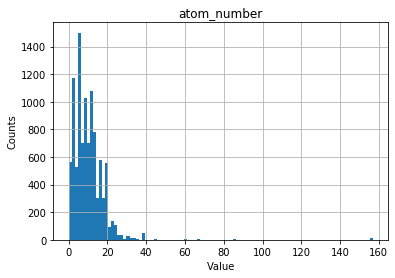

In [12]:
# plotted as before
use_db.atom_number.hist(bins=100)
plt.title("atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

We decided to scale by both a logarithmic transformations ans a MinMax scale

In [0]:
# logarithmic transformations
use_db.atom_number = use_db.atom_number.apply(lambda x: np.log1p(x))
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["atom_number"]])
use_db[["atom_number"]] = minmax.transform(use_db[["atom_number"]])

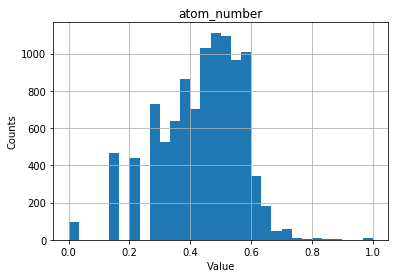

In [14]:
# plotted as before
use_db.atom_number.hist(bins=30)
plt.title("atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## alone_Atom Number

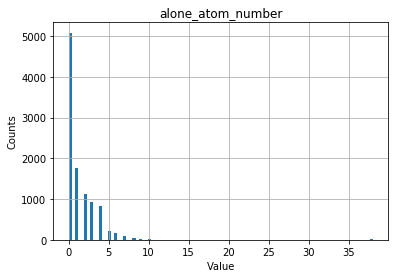

In [15]:
# plotted as before
use_db.alone_atom_number.hist(bins=100)
plt.title("alone_atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## Bonds Number

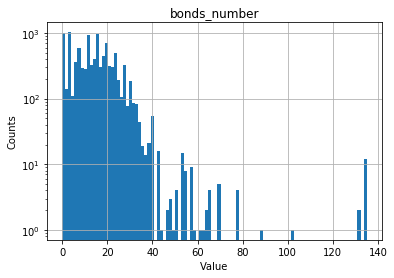

In [16]:
# plotted as before
use_db.bonds_number.hist(bins=100)
plt.yscale("log")
plt.title("bonds_number")
plt.xlabel("Value")
plt.ylabel("Counts");

We decided to scale by both a logarithmic transformations ans a MinMax scale

In [0]:
# logarithmic transformations
use_db.bonds_number = use_db.bonds_number.apply(lambda x: np.log1p(x))
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["bonds_number"]])
use_db[["bonds_number"]] = minmax.transform(use_db[["bonds_number"]])

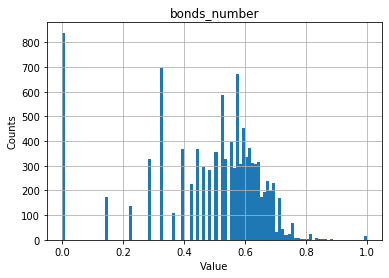

In [18]:
use_db.bonds_number.hist(bins=100)
plt.title("bonds_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## tripleBond

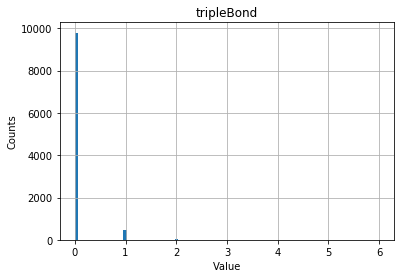

In [19]:
# plotted as before
use_db.tripleBond.hist(bins=100)
plt.title("tripleBond")
plt.xlabel("Value")
plt.ylabel("Counts");

## doubleBond

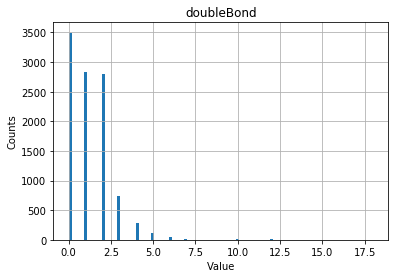

In [20]:
# plotted as before
use_db.doubleBond.hist(bins=100)
plt.title("doubleBond")
plt.xlabel("Value")
plt.ylabel("Counts");

## Rings number

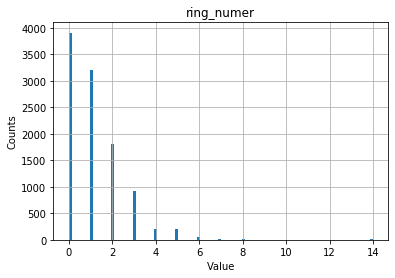

In [21]:
# plotted as before
use_db.ring_numer.hist(bins=100)
#plt.yscale("log")
plt.title("ring_numer")
plt.xlabel("Value")
plt.ylabel("Counts");

We assume this as a categrical features and we don't change it

## Mol

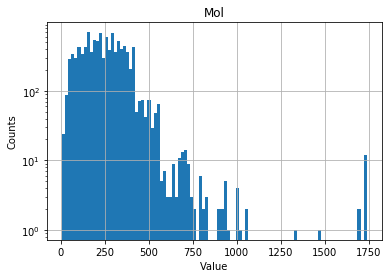

In [22]:
# plotted as before
use_db.Mol.hist(bins=100)
plt.yscale("log")
plt.title("Mol")
plt.xlabel("Value")
plt.ylabel("Counts");

We only this to scale the range of this variable

In [0]:
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["Mol"]])
use_db[["Mol"]] = minmax.transform(use_db[["Mol"]])

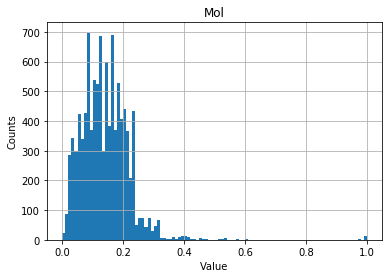

In [24]:
# plotted as before
use_db.Mol.hist(bins=100)
plt.title("Mol")
plt.xlabel("Value")
plt.ylabel("Counts");

## Morgan Density

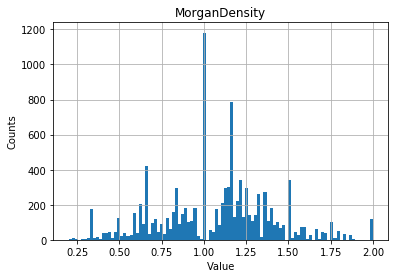

In [25]:
# plotted as before
use_db.MorganDensity.hist(bins=100)
#plt.yscale("log")
plt.title("MorganDensity")
plt.xlabel("Value")
plt.ylabel("Counts");

We keeo this untouch

## LogP

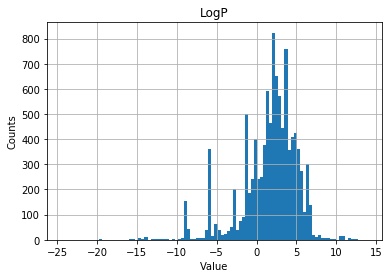

In [26]:
# plotted as before
use_db.LogP.hist(bins=100)
plt.title("LogP")
plt.xlabel("Value")
plt.ylabel("Counts");

### categorical features  
We will need to encode exposure_type, conc1_type, class, tax_order, family_genus, species. Not done now because we will encoding depending on the case

### Simple classification with Smile Features
Considering a threshold of 1mg/L of mortality

In [0]:
X = use_db.copy()
X = X[[
 'exposure_type',
#  'obs_duration_mean',
 'conc1_type',
 'species',
 'atom_number', 
    'alone_atom_number', 
    'tripleBond',
       'doubleBond',
 'bonds_number',
  'ring_numer',
  'Mol', 
  'MorganDensity', 'LogP']]

In [28]:
X['exposure_type'].unique()

array(['F', 'S', 'R', 'AQUA', 'P', 'IP', 'E', 'FD', 'O'], dtype=object)

In [29]:
X['conc1_type'].unique()

array(['F', 'A', 'T', 'D', 'L', 'U'], dtype=object)

In [30]:
len(X['species'].unique())

411

For this  vaiables we decided to transform than by an OrdinalEncoder, in order to have all numnerical variables

In [0]:
enc = OrdinalEncoder(dtype=int)
enc.fit(X[["exposure_type", "conc1_type","species"]])
X[["exposure_type", "conc1_type","species"]] = enc.transform(X[["exposure_type", "conc1_type","species"]]) + 1

In [32]:
X.head()

,exposure_type,conc1_type,species,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
0,3,3,327,0.317908,2,0,1,0.488106,1.0,0.086004,1.3,2.2482
1,3,1,314,0.317908,2,0,1,0.488106,1.0,0.074755,1.3,1.1770
2,9,1,219,0.317908,2,0,1,0.488106,1.0,0.074755,1.3,1.1770
3,9,1,265,0.317908,2,0,1,0.488106,1.0,0.074755,1.3,1.1770
4,9,1,314,0.317908,2,0,1,0.488106,1.0,0.074755,1.3,1.1770


We also devide the label, in order to have a binary classification

In [0]:
y = use_db["conc1_mean"].copy().values
y = np.where(y > 1, 1, 0)

In [34]:
len(X)

10338

In [35]:
print(len(y[y==0]), len(y[y==1]))

3996 6342


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN

We first implement a classification by a K Neighbors Classifier

In [0]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train.ravel())
y_pred = neigh.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.7171746776084408

0.84 is the accuracy on tis first model

## Random Forest

In [0]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train.ravel())
y_pred = forest.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.854630715123095

This is the second model we have implemented, with an accurancy of the 0.91. which for the moment is not bad

## Gradient Boosting

In [0]:
grboost = GradientBoostingClassifier()
grboost.fit(X_train, y_train.ravel())
y_pred = grboost.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8215123094958968

In [0]:
# grid = GridSearchCV(forest, param_grid={"n_estimators": list(range(1, 500))}, scoring="accuracy", cv=5)
# grid.fit(X_train, y_train.ravel())

## bozza, NON RUNNARE!!!

In [0]:
df = pd.DataFrame(columns = X.columns, index=['KNN','Random Forest','Gradient Boosting'])

In [0]:
for i in X.columns:
    new_train = X_train.copy()
    new_test = X_test.copy()
    del new_train[i]
    del new_test[i]
    l=[]
    neigh = KNeighborsClassifier()
    neigh.fit(new_train, y_train.ravel())
    y_pred = neigh.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    grboost = GradientBoostingClassifier()
    grboost.fit(new_train, y_train.ravel())
    y_pred = grboost.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    df[i] = l

KeyboardInterrupt: 

## How doea the accurancy change without the column-variale?


In [0]:
corr = X.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,exposure_type,obs_duration_mean,conc1_type,species,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
exposure_type,1,-0.06,-0.13,-0,0.16,0.02,-0.04,0.09,0.16,0.09,0.13,0.03,0.07
obs_duration_mean,-0.06,1,0.01,0.02,-0.01,0.01,0.03,0,-0.06,-0.04,-0.02,-0,-0.05
conc1_type,-0.13,0.01,1,-0.09,-0.41,0.35,-0.02,-0.1,-0.68,-0.38,-0.36,-0.06,-0.59
species,-0,0.02,-0.09,1,-0.01,-0.01,-0.01,0,0.03,0.01,-0.01,0.01,0.02
atom_number,0.16,-0.01,-0.41,-0.01,1,0.17,0.03,0.6,0.74,0.43,0.76,-0.02,0.38
alone_atom_number,0.02,0.01,0.35,-0.01,0.17,1,-0.06,0.48,-0.11,-0,0.25,-0.12,-0.48
tripleBond,-0.04,0.03,-0.02,-0.01,0.03,-0.06,1,-0.07,0.04,0.05,0.03,0.09,0.07
doubleBond,0.09,0,-0.1,0,0.6,0.48,-0.07,1,0.42,0.24,0.51,0.13,-0.01
bonds_number,0.16,-0.06,-0.68,0.03,0.74,-0.11,0.04,0.42,1,0.64,0.72,-0.03,0.68
ring_numer,0.09,-0.04,-0.38,0.01,0.43,-0,0.05,0.24,0.64,1,0.69,-0.26,0.49


In [0]:
df

,exposure_type,obs_duration_mean,conc1_type,species,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
KNN,0.855328,0.857037,0.851339,0.859259,0.851966,0.848148,0.850484,0.845641,0.851624,0.850313,0.849174,0.849573,0.829231
Random Forest,0.906610,0.913903,0.910655,0.884217,0.912593,0.913390,0.913105,0.912650,0.911681,0.912536,0.901311,0.912308,0.911396
Gradient Boosting,0.829972,0.830085,0.826154,0.831054,0.831510,0.830085,0.829972,0.827578,0.828604,0.828547,0.812194,0.831966,0.817436


In [0]:
df1 = pd.DataFrame(columns = X.columns, index=['KNN','Random Forest','Gradient Boosting'])

In [0]:
new_train = X_train.copy()
new_test = X_test.copy()
for i in X.columns:
    
    l=[]
    neigh = KNeighborsClassifier()
    neigh.fit(new_train, y_train.ravel())
    y_pred = neigh.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    grboost = GradientBoostingClassifier()
    grboost.fit(new_train, y_train.ravel())
    y_pred = grboost.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    df1[i] = l
    del new_train[i]
    del new_test[i]    
    

In [0]:

for i in range(1,len(X.columns)):
    col = list(X.columns[:i])
    l=[]
    new_train = X_train[col]
    new_test = X_test[col]
    
    neigh = KNeighborsClassifier()
    neigh.fit(new_train, y_train.ravel())
    y_pred = neigh.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    grboost = GradientBoostingClassifier()
    grboost.fit(new_train, y_train.ravel())
    y_pred = grboost.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    df1[X.columns[i]] = l 

In [0]:
df1

,exposure_type,obs_duration_mean,conc1_type,species,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
KNN,NaN,0.440627,0.497208,0.573048,0.657037,0.744444,0.764729,0.771624,0.796467,0.803305,0.820513,0.824957,0.829231
Random Forest,NaN,0.586838,0.603305,0.623476,0.685698,0.772422,0.810085,0.819772,0.853732,0.883875,0.883989,0.910826,0.912137
Gradient Boosting,NaN,0.586838,0.601481,0.616695,0.634587,0.702051,0.708262,0.712934,0.740855,0.773675,0.778860,0.814473,0.817436


## KNN

In [0]:
import itertools
to_compare = list(itertools.combinations(list(X_train.columns), 2))

In [0]:
df2 = pd.DataFrame(columns = ['Accurancy'], index=to_compare)

In [0]:
for i in df2.index:
    
    new_train = X_train[list(i)]
    new_test = X_test[list(i)]
    
    neigh = KNeighborsClassifier()
    neigh.fit(new_train, y_train.ravel())
    y_pred = neigh.predict(new_test)
    df2['Accurancy'].loc[i] = accuracy_score(y_test, y_pred)

In [0]:
df2.sort_values(by= ['Accurancy'],ascending=False).head(20)

,Accurancy
"(species, Mol)",0.849345
"(species, LogP)",0.849003
"(bonds_number, Mol)",0.847749
"(ring_numer, Mol)",0.846097
"(exposure_type, Mol)",0.842108
"(atom_number, Mol)",0.841368
"(tripleBond, Mol)",0.838746
"(conc1_type, Mol)",0.837436
"(doubleBond, Mol)",0.835783
"(Mol, LogP)",0.83208


## RANDOM FOREST

In [0]:
df3 = pd.DataFrame(columns = ['Accurancy_RF'], index=to_compare)

In [0]:
for i in df3.index:
    
    new_train = X_train[list(i)]
    new_test = X_test[list(i)]
    
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    df3['Accurancy_RF'].loc[i] = accuracy_score(y_test, y_pred)

In [0]:
df3.sort_values(by= ['Accurancy_RF'],ascending=False).head(20)

,Accurancy_RF
"(species, Mol)",0.890484
"(species, LogP)",0.882906
"(exposure_type, Mol)",0.869516
"(conc1_type, Mol)",0.862735
"(Mol, LogP)",0.861425
"(ring_numer, Mol)",0.860456
"(Mol, MorganDensity)",0.860228
"(bonds_number, Mol)",0.860171
"(atom_number, Mol)",0.860114
"(doubleBond, Mol)",0.859829


## GRADIENT BOOSTING

In [0]:
df4 = pd.DataFrame(columns = ['Accurancy_GB'], index=to_compare)

In [0]:
for i in df4.index:
    
    new_train = X_train[list(i)]
    new_test = X_test[list(i)]
    
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    df4['Accurancy_GB'].loc[i] = accuracy_score(y_test, y_pred)

In [0]:
tot = df4.rank()['Accurancy_GB'] + df3.rank()['Accurancy_RF'] + df2.rank()['Accurancy']
        

In [0]:
tot = pd.DataFrame(tot)

In [0]:
tot = tot.reset_index()

In [0]:
top_features= tot.explode('index').sort_values(by=[0],ascending=False).groupby('index').sum()

In [0]:
try_features= top_features.sort_values(by=[0],ascending=False).head(6).index

In [0]:
try_features

Index(['Mol', 'LogP', 'MorganDensity', 'bonds_number', 'atom_number',
       'species'],
      dtype='object', name='index')

In [0]:
    new_train = X_train[list(try_features)]
    new_test = X_test[list(try_features)]
    
    neigh = KNeighborsClassifier()
    neigh.fit(new_train, y_train.ravel())
    y_pred = neigh.predict(new_test)
    accuracy_score(y_test, y_pred)

0.8605698005698006

In [0]:
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    accuracy_score(y_test, y_pred)

0.9067806267806268

In [0]:
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    accuracy_score(y_test, y_pred)

0.9065527065527066

In [0]:
try_features = top_features.sort_values(by=[0],ascending=False).index

In [0]:
try_features

Index(['Mol', 'LogP', 'MorganDensity', 'bonds_number', 'atom_number',
       'species', 'ring_numer', 'doubleBond', 'alone_atom_number',
       'conc1_type', 'exposure_type', 'obs_duration_mean', 'tripleBond'],
      dtype='object', name='index')

In [0]:
top_features.sort_values(by=[0],ascending=False)

,0
index,
Mol,2571.0
LogP,2269.0
MorganDensity,1878.5
bonds_number,1654.5
atom_number,1441.0
species,1356.0
ring_numer,1301.0
doubleBond,1074.0
alone_atom_number,1050.0


In [0]:
df1 = pd.DataFrame(columns = try_features, index=['KNN','Random Forest','Gradient Boosting'])
for i in range(1,len(try_features)):
    col = list(try_features[:i])
    l=[]
    new_train = X_train[col]
    new_test = X_test[col]
    
    neigh = KNeighborsClassifier()
    neigh.fit(new_train, y_train.ravel())
    y_pred = neigh.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    forest = RandomForestClassifier(n_estimators = 100)
    forest.fit(new_train, y_train.ravel())
    y_pred = forest.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    grboost = GradientBoostingClassifier()
    grboost.fit(new_train, y_train.ravel())
    y_pred = grboost.predict(new_test)
    l.append(accuracy_score(y_test, y_pred))
    
    df1[X.columns[i]] = l 

In [0]:
df1

index,Mol,LogP,MorganDensity,bonds_number,atom_number,species,ring_numer,doubleBond,alone_atom_number,conc1_type,exposure_type,obs_duration_mean,tripleBond
KNN,0.862165,0.850427,0.856467,0.862336,0.838746,0.843989,0.866610,0.858462,0.843476,0.832080,NaN,0.813504,0.860570
Random Forest,0.907236,0.912308,0.913903,0.905527,0.862393,0.861937,0.905983,0.906382,0.862450,0.861425,NaN,0.859886,0.907692
Gradient Boosting,0.828718,0.829972,0.830484,0.828148,0.817493,0.814758,0.829117,0.825641,0.822165,0.805071,NaN,0.785242,0.826895


In [0]:
X

,exposure_type,obs_duration_mean,conc1_type,species,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
0,9,0.024211,5,40,0.273831,3,0,0,0.000000,0.0,0.100920,0.666667,-5.9945
1,9,-0.740360,5,208,0.273831,3,0,0,0.000000,0.0,0.100920,0.666667,-5.9945
2,3,0.800083,5,312,0.273831,3,0,0,0.000000,0.0,0.100920,0.666667,-5.9945
3,9,0.800083,5,474,0.273831,3,0,0,0.000000,0.0,0.100920,0.666667,-5.9945
4,3,3.037407,5,312,0.273831,3,0,0,0.000000,0.0,0.100920,0.666667,-5.9945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53647,3,0.800083,1,372,0.384370,0,0,0,0.522111,1.0,0.089879,1.166667,2.3901
53648,1,-0.571732,3,422,0.473649,0,0,2,0.576717,1.0,0.122888,1.437500,1.3211
53649,9,0.800083,1,262,0.490837,2,0,2,0.609799,2.0,0.162214,1.368421,0.8126
53650,3,0.800083,1,372,0.384370,0,0,2,0.522111,1.0,0.091541,1.083333,0.4780


## FROM HERE WE USE THE DISTANCE MATRIX

In [0]:
categorical = [
"exposure_type", 
"conc1_type","species",
'tripleBond',
#  'obs_duration_mean'
 ]

In [0]:
non_categorical =[
 'atom_number',
 'alone_atom_number',
 'doubleBond',
 'bonds_number',
 'ring_numer',
 'Mol',
 'MorganDensity',
 'LogP']

In [0]:
X_try  =  X#.head(30000)
y_try = y#[:30000]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_try, y_try, test_size=0.33, random_state=42)
X_try = X_train.append(X_test)

In [0]:
import numpy as np
from scipy.spatial.distance import hamming
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def new_distance_matrix(X, len_X_train, cat_features = [], num_features = [], alpha = 1):
    ''' inputs: matrix X [num_samples, num_features], the list of the categorical features, the list of the numerical features, weight alpha
        output: distance matrix
    '''

    # Training
    X_cat = X[cat_features]
    X_num = X[num_features]
    dist_matr = alpha * squareform(pdist(X_cat, metric = "hamming"))
    dist_matr += squareform(pdist(X_num, metric = "euclidean"))

    dist_matr_train = dist_matr[:len_X_train,:len_X_train]
    dist_matr_test = dist_matr[len_X_train:,:len_X_train]

    return dist_matr_train, dist_matr_test


In [0]:
len_X_train = len(X_train)
X_train_new, X_test_new = new_distance_matrix(X_try, len_X_train, categorical,non_categorical, alpha = 5)

In [0]:
X_train_new.shape

(6926, 6926)

In [0]:
X_test_new.shape

(3412, 6926)

In [0]:
neigh = KNeighborsClassifier(metric = 'precomputed')
neigh.fit(X_train_new, y_train.ravel())
y_pred = neigh.predict(X_test_new)

In [0]:
accuracy_score(y_test, y_pred)

0.817409144196952

## CV

In [0]:
from sklearn.model_selection import KFold

def cv_new_distance(X, y, cat_features = [], num_features = [], alphas = [], ks = [], leafs=[]):

    best_accuracy = 0
    best_alpha = 0
    best_k = 0
    best_leaf = 0

    for alpha in alphas:
      for k in ks:
        for leaf in leafs:
          X_cat = X[cat_features]
          X_num = X[num_features]
          dist_matr = alpha * squareform(pdist(X_cat, metric = "hamming"))
          dist_matr += squareform(pdist(X_num, metric = "euclidean"))
          dist_matr = pd.DataFrame(dist_matr)

          kf = KFold(n_splits=5, shuffle=True)
          accs = []
          for train_index, test_index in kf.split(dist_matr):
            
            X_train = dist_matr.iloc[train_index, train_index]
            X_test = dist_matr.iloc[test_index, train_index]
            y_train = y[train_index]
            y_test = y[test_index]

            neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors=k, n_jobs=-2, leaf_size=leaf)
            neigh.fit(X_train, y_train.ravel())
            y_pred = neigh.predict(X_test)

            accs.append(accuracy_score(y_test, y_pred))
          
          avg_acc = np.mean(accs)
          if (avg_acc > best_accuracy):
            print("New best params found! alpha:{}, k:{}, leaf:{}, acc:{}".format(alpha, k, leaf, avg_acc))
            best_alpha = alpha
            best_k = k
            best_accuracy = avg_acc
            best_leaf = leaf
      
    return best_accuracy, best_alpha, best_k, best_leaf


In [0]:
alphas = np.logspace(-10, -5, 50)
ks = range(1, 10)
leafs = range(10, 50)
best_acc, best_alpha, best_k, best_leaf = cv_new_distance(X_train, y_train, categorical, non_categorical, alphas, ks, leafs)

New best params found! alpha:1e-10, k:1, leaf:10, acc:0.823420069701658
New best params found! alpha:1e-10, k:1, leaf:11, acc:0.8239957074614115
New best params found! alpha:1e-10, k:1, leaf:20, acc:0.8247191877516787
New best params found! alpha:1e-10, k:1, leaf:47, acc:0.8264483931631947
New best params found! alpha:1e-10, k:3, leaf:10, acc:0.8333815722985399
New best params found! alpha:1e-10, k:3, leaf:18, acc:0.8335275394481171
New best params found! alpha:1e-10, k:3, leaf:23, acc:0.83626913800199
New best params found! alpha:5.179474679231202e-10, k:3, leaf:10, acc:0.8365591969202079


KeyboardInterrupt: ignored

# Second test

In [0]:
best_alpha = 5.179474679231202e-10

In [0]:
best_k = 3

In [0]:
best_leaf = 10

In [0]:
len_X_train = len(X_train)
X_train_new, X_test_new = new_distance_matrix(X_try, len_X_train, categorical,non_categorical, alpha = best_alpha)
neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors=best_k)
neigh.fit(X_train_new, y_train.ravel())
y_pred = neigh.predict(X_test_new)

In [0]:
accuracy_score(y_test, y_pred)

0.8490621336459554

# First test

In [0]:
# alphas = np.logspace(-8, 0, 20)
# ks = range(1, 21)
# best_acc, best_alpha, best_k = cv_new_distance(X_train, y_train, categorical, non_categorical, alphas, ks)

New best params found! alpha:1e-08, k:1, acc:0.8202408822625429
New best params found! alpha:1e-08, k:3, acc:0.829771255619631
New best params found! alpha:2.6366508987303555e-08, k:3, acc:0.8329494011804481
New best params found! alpha:1.8329807108324375e-07, k:3, acc:0.8332371679664099


In [0]:
len_X_train = len(X_train)
X_train_new, X_test_new = new_distance_matrix(X_try, len_X_train, categorical,non_categorical, alpha = best_alpha)
neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors=best_k)
neigh.fit(X_train_new, y_train.ravel())
y_pred = neigh.predict(X_test_new)

In [0]:
accuracy_score(y_test, y_pred)

0.8490621336459554